You are a hiker preparing for an upcoming hike. You are given heights, a 2D array of size rows x columns, where heights[row][col] represents the height of cell (row, col). You are situated in the top-left cell, (0, 0), and you hope to travel to the bottom-right cell, (rows-1, columns-1) (i.e., 0-indexed). You can move up, down, left, or right, and you wish to find a route that requires the minimum effort.

A route's effort is the maximum absolute difference in heights between two consecutive cells of the route.

Return the minimum effort required to travel from the top-left cell to the bottom-right cell.

Example 1:

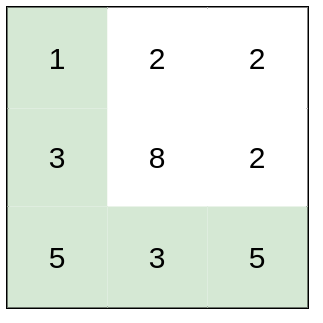

Input: heights = [[1,2,2],[3,8,2],[5,3,5]]
Output: 2
Explanation: The route of [1,3,5,3,5] has a maximum absolute difference of 2 in consecutive cells.
This is better than the route of [1,2,2,2,5], where the maximum absolute difference is 3.

Example 2:

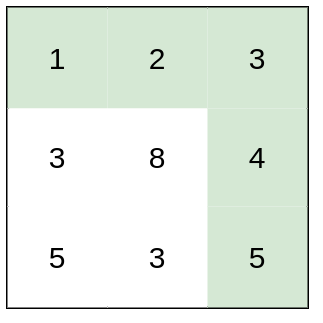

Input: heights = [[1,2,3],[3,8,4],[5,3,5]]
Output: 1
Explanation: The route of [1,2,3,4,5] has a maximum absolute difference of 1 in consecutive cells, which is better than route [1,3,5,3,5].

Example 3:

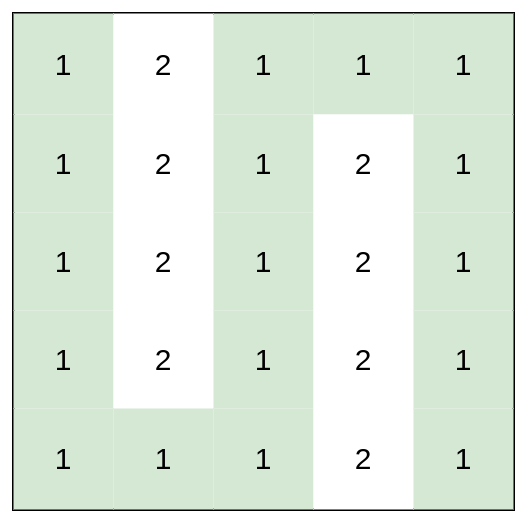

Input: heights = [[1,2,1,1,1],[1,2,1,2,1],[1,2,1,2,1],[1,2,1,2,1],[1,1,1,2,1]]
Output: 0
Explanation: This route does not require any effort.

 

Constraints:

    rows == heights.length
    columns == heights[i].length
    1 <= rows, columns <= 100
    1 <= heights[i][j] <= 106


In [64]:
from typing import List
from collections import deque

class Solution:
    def minimumEffortPath(self, heights: List[List[int]]) -> int:
        m = len(heights)
        n = len(heights[0])
        
        mask = [[-1 for _ in range(n)] for _ in range(m)]
        
        efforts = []
        q = deque()
        q.append(((0, 0), [], 0))
        while q:
            curr, visited, effort = q.popleft()            
            if curr in visited:
                continue
                
            i, j = curr
            if mask[i][j] != -1 and effort >= mask[i][j]:
                continue
            else:
                mask[i][j] = effort
                
            visited = visited.copy()
            visited.append((i, j))
            
            if i == m - 1 and j == n - 1:
                efforts.append(effort)
            else:
                if i - 1 >= 0:
                    q.append(
                        ((i - 1, j), visited, max(effort, abs(heights[i][j] - heights[i - 1][j]))))
                if i + 1 < m:
                    q.append(
                        ((i + 1, j), visited, max(effort, abs(heights[i][j] - heights[i + 1][j]))))
                if j - 1 >= 0:
                    q.append(
                        ((i, j - 1), visited, max(effort, abs(heights[i][j] - heights[i][j - 1]))))
                if j + 1 < n:
                    q.append(
                        ((i, j + 1), visited, max(effort, abs(heights[i][j] - heights[i][j + 1]))))
        
        return min(efforts)


In [ ]:
class Solution:
    def minimumEffortPath(self, heights: List[List[int]]) -> int:
        def helper(value):
            stack = [(0, 0)]
            seen = {(0, 0)}
            
            while stack:
                (x, y) = stack.pop()
                if x == m - 1 and y == n - 1:
                    return True
                
                for (r, s) in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                    p, q = x + r, y + s
                    if 0 <= p < m and 0 <= q < n: 
                        if (p, q) not in seen: 
                            effort = abs(heights[p][q] - heights[x][y])
                            if effort <= value: 
                                seen.add((p, q))
                                stack.append((p, q))
                                
            return False 
        
        m, n = len(heights), len(heights[0])
        
        start = -1
        end = max(max(row) for row in heights)
        
        while end - start > 1: 
            mid = (end + start) // 2
            if helper(mid):
                end = mid
            else: 
                start = mid
                
        return end 

In [65]:
s = Solution()
s.minimumEffortPath([[1,2,2],[3,8,2],[5,3,5]])

2

In [66]:
s.minimumEffortPath([[1,2,2],[3,8,2],[5,3,5]])

2

In [67]:
s.minimumEffortPath([[1,2,1,1,1],[1,2,1,2,1],[1,2,1,2,1],[1,2,1,2,1],[1,1,1,2,1]])

0

In [68]:
s.minimumEffortPath([[1]])

0

In [69]:
s.minimumEffortPath([[1,10,6,7,9,10,4,9]])

9

In [71]:
s.minimumEffortPath([[164930,350017,971747,322291,940404,681643,988613,923861,286550,778068,184702,155505,111532,474331,270793,3472,306242,181968,526233,39736,9390,576169,123444,977326,207339,472211,166669,954503,208849,559061,356008,896171,819221,816160,658761,262125,529050,252586,94401,234355,588800,214648,485909,958726,428590,201834,599753,578002,624964,977131,107553,406164,566519,279966,438053,445632,196119,506459,112373,109243,858919,999855,337052,55130,546422,478096,557281],[361106,328198,492255,371514,468347,833571,911052,861170,361280,380797,386126,714500,515654,632496,336275,438226,797317,997546,339023,699001,462689,463168,258791,650018,208210,133530,622754,48599,944352,304743,714956,204516,302330,162680,927781,421989,258549,111803,9504,446668,914294,176930,316869,954847,340115,649687,41606,53379,715224,63410,192571,371613,550607,701862,636115,794295,928305,634831,935435,243143,390943,10215,796912,880217,214308,481640,996311],[382667,661698,448550,524050,238531,18427,374430,842234,531625,291066,165224,162550,965777,442680,221870,206711,96137,848287,783711,707362,480709,169865,111451,109688,328648,393662,150259,699239,812143,566993,764581,275591,328174,685803,192038,987339,397844,340654,320431,505732,493841,749024,397857,864956,781083,425607,72140,460343,143014,318812,528841,75559,789656,215517,940190,486954,951151,119053,83245,739011,865839,831849,80993,245525,199333,337374,874974],[193630,965897,305942,938204,458048,90522,592730,513377,682936,233846,81352,638994,723190,946544,797888,591752,771361,580886,527420,940460,899092,400802,848732,260710,48763,666779,747500,205763,803451,13464,670151,364878,963187,804486,531025,933068,61007,760230,104371,21491,446299,409576,418329,702814,651326,127825,567807,932227,436538,491581,20818,707888,757394,987060,492718,769458,122209,398476,351386,607587,192095,538840,360495,206716,465936,754853,595150],[115099,261653,195777,347497,219180,827666,437774,101816,38100,558015,400744,906032,457556,492932,964465,523845,893524,812556,421273,670940,415735,972567,67077,224965,535759,592468,424291,373320,698888,141927,556970,820447,337588,563662,412449,177092,849866,482321,891842,562194,15156,182907,127557,984061,602174,941169,772447,182168,514161,255617,271240,179801,757703,142483,78794,380041,919551,813826,869561,447627,838662,667246,23890,449,109059,522413,742316],[695486,283920,228816,525178,121217,772211,102796,693956,846603,944792,274034,810123,317108,144353,553109,884282,864568,399581,814787,896528,440528,35419,4017,18487,134140,634210,755402,889589,491280,628752,328865,869993,488323,504453,446750,24109,985363,627805,772044,554511,984389,368906,477564,193716,117999,985034,696504,340420,403371,857390,341221,24142,550807,268256,238390,300248,434043,561555,546407,625025,982788,819551,838662,976604,728786,866646,243833],[876526,234923,452735,803024,578113,634939,932671,446721,443954,291748,946558,462032,382122,875379,156201,232106,558949,832243,655798,816382,521775,53299,213485,160140,384547,967398,408836,930777,513010,765801,434858,274490,27175,299035,582540,987565,987837,177752,726256,874862,141570,508547,993575,195340,601150,80567,391025,926120,575158,447041,271724,399082,269990,495723,103205,98254,375711,128078,725061,10008,890824,886665,851812,220220,843568,487823,653897],[54460,767197,52771,777007,93314,361523,42025,630410,6156,74632,861289,271070,662257,832876,389282,560917,105254,9726,794983,519596,577093,873087,207862,2250,781604,405234,44566,288628,654679,610696,386376,237554,98197,455353,231790,712731,350590,24192,976097,794939,362291,936404,354977,769763,931271,555955,333164,115995,531995,770767,931870,762536,835255,278808,678907,192833,747555,641056,643140,691276,830988,345467,709430,885530,197052,237722,903140],[507199,858200,726269,219273,196961,626219,279315,536089,754999,296465,566316,584184,905762,922462,598179,867920,910907,222478,754437,23678,373233,201008,84346,892830,971027,949867,310795,691808,355270,921765,700865,236439,923872,197962,84640,908464,831687,513180,196114,666999,798942,936656,578200,551032,406933,777108,888792,865526,956862,561129,660860,772218,531077,999656,408932,343497,421593,978612,359172,117588,917587,345537,282498,997453,788277,485351,42326],[838267,634848,974665,501007,373319,4802,935536,563683,735701,620029,850589,378969,242174,299418,923758,593847,58542,666997,21488,512660,62655,467949,941593,530876,749134,161554,530066,956568,756569,662471,960830,486942,947153,247106,220691,440950,614034,16404,731465,853811,149658,792096,513284,910758,323646,848746,894022,185547,248225,197783,951829,116813,828174,411668,257400,25448,601018,298850,816850,772409,330937,554724,303779,978508,56379,403763,700569],[31373,100639,535236,991879,376776,959710,222186,262248,315884,324464,355778,832079,765688,288028,688885,919185,832177,591316,463162,46463,588697,257445,544312,929827,23937,830224,602213,39047,44445,28394,37594,113533,515224,572309,812924,24203,794881,732041,801758,970249,596645,624926,425469,678268,911280,912681,753904,521170,466081,495106,884638,458156,997271,510549,435444,927934,395302,69567,980152,276764,544136,200461,888868,639981,112289,529931,4031],[675305,826789,799168,354131,447343,339283,306090,792217,5455,437408,763668,533304,991863,998734,915947,96575,947255,742480,238944,274870,940788,150470,477797,279065,56741,842436,737929,166428,817346,242922,369764,220273,498812,446929,576614,173237,660592,688818,888905,540429,429061,710629,450335,543822,1383,423791,752705,366582,116537,900923,341885,216631,511842,179526,499576,431289,300528,302849,67658,205604,899215,266682,811181,491479,879032,294974,781853],[91510,967264,389212,495192,36994,174571,707542,975993,225401,640828,333892,515947,533163,977623,988179,221219,339852,79395,59205,728581,673961,16972,823489,567290,568577,63428,559302,832947,680935,564284,405686,634168,313743,710705,730004,261728,538294,569777,33925,789367,133735,188728,333885,288683,545339,407690,948280,817397,550170,630322,878064,536670,940387,909444,364715,787713,457219,841130,744099,138831,827545,920734,265106,511906,259972,712488,863612],[920234,540344,461861,627072,855019,936240,386928,651877,363330,744147,31031,476985,405001,521138,353979,881118,319406,315034,66225,349527,603635,334590,162642,441409,904872,571770,800194,861867,407,692690,93922,186233,648359,561456,147720,73423,364386,674709,518501,169208,46697,370616,812157,790907,812286,540554,138508,410191,996939,419108,19751,558044,616231,950663,783900,21281,463454,862710,715626,614059,847895,500623,527196,594599,904950,19067,861691],[843824,850239,489324,580906,337191,249378,527975,521563,301992,496487,513402,953896,991772,956932,796023,524264,997178,295387,341726,745842,873411,835093,688858,737591,846988,316893,889454,515813,33648,965471,951200,395580,165658,990362,812193,30510,23585,776151,193168,877380,348746,554925,70892,891945,403873,158249,420208,487881,885781,664858,858413,711343,477044,675919,956988,721985,881145,683259,927257,112038,671440,891555,320650,676900,552770,227119,845883],[932814,36009,955161,359991,526055,76709,589091,90590,701358,224481,28805,580757,735888,133234,967257,320796,448361,207978,414481,342604,535395,935505,309389,762612,366353,849113,500711,394687,783701,394899,542145,669652,724207,371328,932648,314975,220464,831683,985443,509921,817187,752241,894021,329442,396876,640387,813387,512898,796020,387703,171766,123698,683521,449721,904292,736330,362987,632870,213251,678946,837310,206649,303246,440283,674273,331848,949981],[419098,40066,681543,547753,961479,449593,103802,78699,678785,126715,531163,244031,15157,972359,890908,482934,55004,822667,468972,891945,624539,664943,76364,751572,874820,555408,785257,592763,48886,492282,655345,344877,284881,637251,495598,879730,884237,40380,908273,801192,708124,363280,297189,765955,708880,585982,481936,657631,457425,47842,879868,529687,729309,654748,474797,372510,614869,193536,505281,248836,822332,957747,480748,39006,500408,425224,713081],[889285,633100,70332,256895,800959,726820,892254,891358,783060,301877,898418,490392,538418,672650,297017,669393,267672,362447,873428,824267,209318,469868,325749,126403,901376,368763,429608,820451,187946,414627,938795,375843,38720,338872,834080,585497,521129,978935,552124,466068,456814,291528,769710,98805,610750,935429,501864,253142,715521,318290,849804,99301,668061,519257,43549,851559,950834,494452,261449,244890,526222,422337,660498,725845,344095,846818,357336],[141262,310913,444614,4066,129109,858522,952329,464039,739700,900301,626713,481469,671833,459410,670982,878036,231115,79404,991203,631496,806834,167356,871116,597864,279779,586517,257330,828049,606124,885173,317413,424548,847572,113027,146220,151028,700541,883508,630726,688754,288893,5685,891170,912505,736018,254390,784814,887074,127347,910560,784739,644426,105263,741700,74589,728555,271559,662611,570636,143590,732621,725858,778364,378976,138010,381042,546353],[942649,943480,359936,99227,916681,957575,622719,147899,137986,719437,656631,348742,130269,254430,194369,230766,477330,162321,209487,419160,197040,722779,505261,500265,333715,658217,410934,966240,12305,55080,881304,831219,902363,680376,439768,846528,248381,799692,807402,331045,908361,454773,341681,779737,419955,463108,390452,769092,322112,74146,255344,671471,905766,94056,778894,71802,231030,920527,595473,934261,34559,890823,66235,276110,180094,680307,308664],[480289,869418,511134,660827,481536,987846,664083,465410,628562,988457,34236,125431,758209,586727,490548,681275,370255,295058,264823,622509,39012,10100,44489,574623,738480,502399,305325,378739,919517,32339,619798,143088,294007,637064,215531,289867,163221,509788,240356,377129,661154,121202,888251,522336,413024,692608,250211,276778,418095,14500,467236,826046,224264,892652,735234,500137,582240,152248,647416,816681,343806,814906,876597,306880,10898,768432,372301],[203621,33368,411706,412187,404964,826676,265294,92220,871733,8658,444015,110807,599378,817339,746459,418737,554706,525104,780804,654033,625568,240451,291290,801047,38178,298160,639398,857006,222569,704773,534918,82381,28148,388931,727259,729361,446900,82216,151074,82568,965914,784012,790143,996984,227659,912259,371201,365774,752920,893082,741363,773446,368163,887775,670945,478796,273263,61875,377703,262690,755691,105366,967033,1534,882428,410554,465327],[38726,654631,758370,102270,396990,436375,918111,869807,591645,674614,538328,945268,336003,304326,584646,403300,129077,447982,68089,261403,678741,896096,132060,604621,749599,961965,61553,695732,100942,969461,280144,361867,898795,949958,813495,778783,726485,88732,602731,182741,511481,205116,835822,922085,123700,20413,170439,541993,311735,405053,444486,41398,41563,585883,669903,149762,971504,321408,45985,658875,759269,909823,694186,735200,937335,669178,351698],[157567,56862,111041,412334,523124,2484,708656,806097,250700,744803,304465,1494,403326,693914,966903,146276,547377,397561,59591,537455,354814,758210,393291,61334,824299,150382,834500,542852,620831,453942,487168,526989,495634,537183,257247,821488,566430,586726,536054,639525,405064,36371,645058,281122,20955,810768,224167,509619,550128,941277,733723,455318,851211,426454,577037,571653,930823,151749,543017,634821,627872,788632,301001,825988,183722,79047,355930],[328577,639947,858295,963910,676669,239022,881168,459181,589529,4792,407657,948491,691382,154296,942821,215127,245806,745433,929095,787064,963854,512323,13565,75531,720786,652914,676341,253862,177355,305923,391722,422568,616926,580127,542951,937741,271052,791446,2929,276608,563038,263428,530686,715820,832652,746401,913478,235930,80516,727905,753600,54071,511822,309205,321971,421652,73079,551472,629851,810239,299669,144620,32924,460221,813893,762753,95859],[709859,294906,447896,339316,434995,422816,875220,399999,995989,744023,411174,286554,440438,332352,143727,440328,503939,66799,658488,10542,712358,422027,6518,30982,968858,82662,368641,407672,10896,123928,533249,601907,437192,865986,29358,763659,843889,653190,954559,292396,109202,881798,480,681318,951190,861407,479736,589869,54284,925997,337868,750378,248506,381341,916219,105300,752842,108334,600106,687555,769122,849327,169642,883276,721862,948176,264382],[132956,594815,588655,544196,289390,888518,130274,13320,382280,292796,804024,584645,886214,152021,817149,99124,622599,834776,492672,342372,681532,798876,342574,316369,859499,94715,180874,115775,110454,875569,577377,613462,382142,623263,44801,840438,127246,967898,223197,129256,511858,957320,746338,772778,978346,107021,781860,766021,303397,500642,814874,570235,51544,898433,733169,948448,105147,692479,500491,360498,258685,577644,936735,82252,808559,446671,864908],[471798,82909,454894,648621,194493,745959,329880,967412,311943,173511,743869,178290,941771,793282,827993,455096,849934,889222,836558,915202,307867,879542,109188,753261,941210,703240,196692,908302,800223,177963,476062,614851,425399,467883,100315,431797,963562,637700,526722,416469,374500,368106,76288,942978,170312,273241,853686,931157,507099,329172,113551,425209,515658,483452,317937,484872,440228,385454,506385,363651,602463,225685,738442,831217,286691,626267,661567],[247908,187458,977034,925802,458711,327206,158085,783823,212689,160794,793482,953717,313066,137011,937246,66978,861901,849107,522184,605377,514810,846028,766315,438797,714488,22359,755331,2829,36336,718343,562495,698540,556640,619347,451431,920241,332344,731783,233873,789024,184387,780957,379545,47971,139688,656605,737061,774466,29929,260233,983702,600446,746555,604772,551668,981657,131777,593643,102998,574102,84084,511015,133030,666729,784622,481547,861213],[22813,272082,950706,269803,580475,808079,941278,592893,910997,538313,123400,212390,790268,739327,368513,34872,188526,340098,678124,124326,932890,22523,249326,94183,201898,477363,49892,508313,817322,944342,500817,310002,999211,463584,837782,820460,178868,559535,234239,233149,720733,978853,133113,792816,998250,468531,848654,698593,376079,571146,74456,661132,853518,991665,918058,643876,863622,928051,874219,149659,58683,786427,752445,744207,702031,592720,870305],[68604,630149,582474,427006,804120,406876,452736,628614,986365,423903,555090,98649,354681,969815,499314,550243,463935,767744,833700,812670,418611,965905,250700,999198,520622,58279,770697,543576,102780,234383,456429,25754,532986,192554,139034,988934,975534,343628,117802,991268,677113,845964,214333,310945,983686,371931,712034,779800,63281,350414,548134,865614,89551,640968,656809,796692,717518,688833,236869,470969,293386,840342,388932,104134,997631,739226,994393],[356765,420008,947465,182950,639922,434888,194639,245639,613359,734312,867516,156914,438901,875986,142995,80370,54097,522396,714694,666510,86090,364498,347196,920326,751637,998733,427018,160039,285346,760729,499174,293089,176310,390985,77928,893581,23095,895027,121362,802491,438289,564236,707839,259269,639298,190025,691689,648562,170926,633031,47418,801843,801552,66387,111362,210596,97191,51654,127525,440185,961456,479612,134234,250945,435891,90668,541844],[323723,802543,953747,826799,286366,588705,148385,494147,868979,22929,856341,457354,66860,601241,482819,121109,414576,594632,266898,463896,739298,259896,388037,593329,231010,686918,81845,214083,663019,899036,129331,778780,963157,850478,406066,942884,866287,666530,392764,437003,505463,798889,350451,766080,727981,17560,717474,854842,395910,602276,189983,179144,675050,679835,969238,14280,758992,402192,316558,664800,888242,53708,761983,160757,454505,477347,232964],[455532,201978,774482,433084,200817,696842,456098,530179,937026,395112,897930,835578,606457,542719,965386,894346,156617,235184,277210,75358,224408,900482,515620,638305,156543,935943,914501,425133,338599,663712,372426,687354,676651,263137,431995,95266,463477,70999,147465,882383,72476,278244,447565,37553,360682,435110,841154,462507,117713,460264,835760,333453,741295,467858,556429,147613,254220,759400,830465,562468,125841,964548,562769,953044,1633,826656,956650],[734988,800465,565708,390309,961237,347970,328619,722344,105742,290221,873859,658777,798129,294690,478817,270132,725644,382837,600138,532948,522555,70937,789670,282120,237219,717459,880716,813110,4417,749853,347714,567111,347091,314222,11995,245695,937315,450369,340221,766442,837808,34435,399109,65096,420897,604692,936998,619631,914856,508367,983847,649004,536675,513785,285976,870823,385637,941384,487164,577728,947446,334945,199785,118347,871951,717774,954671],[572160,886078,239587,814593,544044,513176,751352,52597,491758,71092,16941,971829,100850,467572,632602,213479,256638,573673,732517,815526,702065,687620,946276,506841,225927,832045,284716,612235,59158,132075,524177,974171,122698,677175,994702,864099,472031,714095,440932,675785,229618,506387,308007,792999,520044,136333,505674,495034,627254,477527,308467,141770,102114,884283,23397,744822,943108,187930,251644,762577,24028,178127,589413,638405,440993,667762,238655],[114743,442490,34816,543184,447660,904925,564010,8339,119561,46886,594841,592711,864721,277721,157196,794158,332696,319247,573294,586127,464281,704341,192423,351481,664313,478357,940326,710966,302769,982959,859249,658593,481976,82294,331740,105718,981688,810162,669188,838191,927532,973637,127696,565415,331662,866585,350199,543053,553708,369573,981357,214150,338773,278780,306555,722679,505235,277403,6404,91306,503249,740214,223598,504428,643458,577714,594639],[120710,479788,109756,187294,288214,862503,192678,930335,302403,271488,232202,443166,968921,36981,795116,440475,873201,127850,323150,441251,635542,269705,208482,443955,403079,408255,24249,216309,95502,732876,149209,609556,479955,900567,255020,411910,8599,895177,40762,6495,99299,74582,345219,297200,926905,896514,334303,398415,564733,835667,204641,660403,206617,282121,998657,57453,536017,155110,100496,130714,22462,859769,122977,903065,290245,603070,351108],[547351,210448,113322,382731,437942,842862,578846,835470,599710,409967,116410,278958,196902,934597,103450,966071,702248,962419,322167,143776,783293,265556,390747,783995,61989,671555,851321,958158,362978,335620,42274,67529,507053,716707,803054,594637,396742,846698,494594,966284,917002,588146,121646,109987,497721,278895,805692,538366,538764,493845,992999,930497,55525,70795,940715,545255,354148,677406,201558,555380,262947,325964,36216,914347,979116,3372,355087],[337042,344469,126795,408030,931242,133008,964288,371198,342058,402320,450184,469136,135264,264342,925941,363382,688026,213171,440721,754788,248665,904644,287839,49757,639163,949030,393404,813106,333935,908661,516132,459969,562509,122305,405597,86800,364520,72771,667427,561215,510281,43823,549852,588235,617177,883643,360723,202070,406370,955708,776458,891794,872816,316941,800754,555586,470148,117016,382233,749044,109661,639438,237727,334148,475634,414814,861937],[758236,948815,157428,693925,504888,355071,606916,510004,39579,11408,408226,691440,994079,64680,330556,36142,580489,565123,367704,518786,765274,846878,511001,864916,98553,867974,909669,974790,813082,550918,34712,8002,617495,760490,960918,176889,970503,591435,230531,528677,385318,785993,258377,72204,247002,806774,599610,154941,22826,441955,367216,866189,48003,194308,830762,96417,834478,54237,74446,48141,208709,640887,745912,191369,520420,817581,631855],[862522,48558,423109,920917,818233,715366,259313,965068,437081,388498,412879,543031,849895,537062,262296,815441,398068,665277,80130,54327,955176,135632,498184,615408,96574,257160,701311,316714,927804,322281,905585,473927,87010,885833,435802,686371,800193,462226,284472,747618,526745,48519,738829,938759,379446,754484,648164,456587,554927,789400,763809,518240,975579,338428,712040,185389,242692,277962,871800,223689,594422,155378,433138,441491,920983,951992,562663],[65387,498108,300397,209246,199956,381257,488666,276325,965424,44906,923753,37243,605665,862522,266397,844109,526410,218545,114838,368234,339624,350444,342457,92136,839505,348955,362575,80221,477309,307034,587613,933414,486535,82600,185636,529891,860450,614533,892741,692701,85872,2189,999084,554149,26337,883215,94504,909659,905051,294140,791678,383334,890898,454851,240141,68099,860210,809343,328134,61639,895151,579470,958395,28742,146076,313814,317660],[2911,232225,223913,687984,985116,61191,724396,106954,848907,261051,445070,761918,917831,784156,632860,77592,493068,807119,561164,395424,449900,238032,689715,807949,128870,113746,748533,724053,206868,431898,964311,848634,797083,194559,303260,681656,350909,449079,428571,237096,397113,321783,384498,966186,193124,111709,791201,62262,241880,61734,377810,802468,297148,170739,207823,876099,680341,317711,306604,828786,46034,92934,779080,838735,118108,509539,308716],[872213,38842,441851,753126,48728,460462,88988,585744,16882,939448,638581,273752,147672,270007,621472,893125,608608,339890,804857,187321,663916,50651,328417,585185,909725,451539,355727,440375,998523,656506,197349,338774,206653,24217,627685,364358,749019,671697,148698,996271,936319,645098,363353,968982,797462,242052,870460,656317,8651,500051,692432,299670,3738,154226,682712,749203,656396,882015,816832,903506,968669,76604,634123,896215,807098,366153,447956],[959823,327377,325489,458421,187908,856853,895454,412548,615395,259473,685245,614742,396486,267604,794597,926420,499864,213244,550960,459577,493855,849485,491228,730208,542628,703519,927328,779909,362022,488423,483508,583917,767371,123354,174386,46187,277422,539701,826743,255707,275561,419182,328763,845281,190699,44966,503090,255517,793309,585662,350793,383726,210209,87669,22733,885863,450803,252647,241665,471065,514853,34044,146833,190917,701121,559703,466226],[105627,109799,91802,138533,730861,914089,361686,409707,6551,501242,597029,805654,748006,992744,396151,333092,434393,642944,90449,259873,468428,615922,106664,87016,472827,592852,424566,752402,244876,236349,17765,70029,194733,810343,29045,701756,693671,229752,232313,201203,56903,65132,902243,511493,49437,286315,836831,273380,182428,454398,360471,715801,626467,241643,293685,208270,265531,766605,842400,598009,312301,210989,901137,846551,449561,897408,803034],[824989,708862,600366,236116,212109,745059,706384,957188,457114,850687,485953,988214,534139,86528,835919,62870,722938,184840,103326,459749,529928,536178,951136,631810,320763,4136,884169,467555,17462,768094,228545,158689,818362,136795,661559,581760,692851,571905,580597,582215,381058,862483,112585,766830,397470,895320,770232,611860,787614,268425,274703,638219,223209,274638,725161,180367,664577,282571,288266,958398,204246,249547,367411,78361,747383,475008,939412],[944208,386432,665138,80998,752091,181853,20497,781171,407225,946121,493223,188446,585859,614630,437239,961172,953117,247588,7328,308543,3463,898532,916829,975816,142036,430549,173828,768322,546929,273639,401184,458258,825412,287427,43086,556394,254460,31001,979296,461474,579026,358630,13548,753984,653998,897270,288175,226808,834329,278131,443911,495020,953762,403805,836075,748427,716187,845439,636852,842297,185619,260199,577106,324358,516029,728943,959045],[301659,490846,810241,464784,885555,992033,710690,438403,720874,838349,214155,32866,191360,391311,540499,865770,458515,877893,963042,241748,910318,943648,862582,795909,553765,729282,328414,227969,606844,967772,51725,876719,990492,327142,546457,159728,807673,722552,274372,470123,863126,52739,362542,84321,322725,150292,131971,932174,131820,588844,359857,337864,556759,478858,796327,557238,989417,249608,433613,434095,582668,904127,275324,559251,60168,838567,100731],[986641,674541,983509,406117,462657,774305,371957,116588,172860,507513,84720,602895,829290,46973,325726,767493,439330,228807,599438,683041,93585,262852,514557,572978,36749,975978,760587,81975,501337,181539,409941,400679,616381,342858,767715,800274,743563,503791,354806,105465,551990,499089,270689,502214,131249,410494,621019,568388,409651,99594,641795,872493,994283,112983,444426,255741,373786,83896,674296,909742,838250,103148,885610,562378,842838,242563,452818],[216292,716722,519021,781297,989006,128990,56288,729476,827730,913771,783406,511973,739432,777837,147806,29503,323392,688821,663255,152435,830896,317089,26510,273373,855968,882255,129197,136906,294035,724033,81359,485356,273884,319591,934179,581863,519739,616328,300433,154916,820235,827765,592817,580854,657734,652239,34371,227964,105878,736497,719301,650601,845626,252025,7911,184663,950765,977463,191858,497921,886424,980840,118249,378565,11978,529326,706852],[953589,510421,378784,736137,350536,120595,150277,493690,210518,567759,165577,380370,24092,878642,915262,558177,645307,12194,656104,800817,254056,213238,549553,660561,951001,342962,901247,367861,535394,598719,881520,231799,801588,228789,968319,350197,438707,107596,926314,325949,526399,85215,213439,472720,129015,816491,528085,774473,668975,480703,318720,46500,356969,915355,79866,904923,135632,593344,562187,976547,764790,675836,402746,407776,82841,606097,955387],[729367,902883,841106,74003,166428,791099,320694,8731,528280,765436,933241,509924,168375,107546,980049,708712,701046,6568,354164,301363,345596,925737,283230,722368,971044,489817,899556,662263,68817,199045,269668,701799,533548,922271,901568,76084,417119,609755,438033,286531,980240,488343,77636,810852,926590,848939,967262,923717,655562,503007,532667,111107,510228,379526,430859,519036,349209,426057,54759,373462,999131,169661,661533,37848,469476,148039,616307],[607458,679572,885269,693794,126102,393241,183091,582225,580413,282042,551373,9959,207720,633708,140053,112856,846291,645095,743718,527807,865571,427084,647835,22547,635866,553695,332108,312431,124250,61971,848007,264982,642069,987192,807640,780080,422569,393008,306057,30217,890805,824234,777586,25343,916721,252489,414382,366212,564512,623127,993636,900893,876673,844932,333426,460185,193880,55382,19134,778069,457791,802284,356547,881708,622518,731806,300114],[949981,73203,308149,672405,885179,52461,77356,166472,86586,846840,769228,710022,422520,353925,535947,145819,281125,498814,393351,404713,888780,900005,764096,215017,353488,634040,958464,35741,392400,163694,679222,628058,657877,719383,4974,400050,678241,457027,569489,392865,234411,688496,791456,926113,512005,406179,364933,88665,487805,425753,344090,97632,748196,698573,910840,87745,898805,50173,676620,882420,457893,593586,495971,140588,421136,982698,570410],[90628,236596,256983,620035,282540,692451,313699,739461,217818,51633,209373,792042,509851,494732,781262,13774,743400,245293,7153,368140,899473,599990,507510,207770,268665,943430,628648,198581,18773,319176,900964,386701,196290,661283,597009,396825,775632,785672,577517,694992,868547,484252,886894,270785,676497,163269,828353,304614,975010,356683,747465,471737,506631,112121,374532,50900,725089,476318,782924,242380,724579,363188,659944,286632,409253,506279,57207],[291409,985603,849774,754747,623694,566232,365766,379213,729007,682354,720404,808985,12506,672822,648633,954501,996998,599750,346268,249109,214443,966900,593054,804097,761941,333665,439355,713224,720382,446018,53717,339726,515313,556256,590843,201024,75540,316616,37557,309875,596717,752703,346457,880374,751421,620762,855943,627959,282392,408149,890802,783334,999169,171088,896001,486043,776479,968524,893919,792797,304646,108281,88277,753404,782325,137396,942795],[78913,397309,937738,658724,771681,203837,994182,452557,597911,671416,900282,975841,164068,329784,165610,205421,666102,591573,240628,163801,907754,665968,586566,89401,422011,419930,327733,924714,662873,504656,960326,934988,898447,762051,160671,232402,905510,327409,726772,478578,970171,474308,559758,990817,310428,128812,482284,517614,526754,106712,67633,897342,978516,695683,194066,923789,565520,10725,468472,757324,674924,174370,914881,694220,380687,430036,52378],[929543,24457,641772,147908,468074,893246,936103,17190,605116,60684,866427,383064,643789,711414,824843,143691,841728,540576,497012,242837,432359,728581,767373,738104,176545,162154,831102,485228,45737,90943,920221,35075,973235,325513,349101,825863,243246,401232,12046,495963,133561,704646,366765,345749,262734,653017,270494,8542,37181,379014,5212,634285,367448,417623,553077,952245,261512,848293,779206,760684,609816,266920,863126,310967,668105,331005,678109],[708499,950641,591486,812399,675247,300813,504626,528200,869491,272685,12114,810847,445044,33344,268057,81633,434866,227294,753949,817583,717017,107860,288330,467842,615085,535754,109780,859689,865149,822288,377739,57991,917484,173589,680583,73300,710608,573971,314436,72062,240438,478559,487578,23195,541592,261142,924769,741901,293840,389109,618704,864246,399847,612693,327964,850298,553052,208960,76750,288295,220961,263982,660889,767380,577788,850812,791066],[895084,88810,508587,793137,88263,881075,790958,269635,984573,647536,311096,407628,116198,605288,127079,541733,772244,231336,116002,83637,714515,570682,426824,80014,809724,883815,389360,676637,500618,972428,522571,562897,627458,830888,227110,290880,894921,602860,24287,811628,133740,522681,793812,425342,758454,581680,275360,967507,463936,979591,487359,94790,741648,103119,145759,466439,511712,14711,961723,269433,945385,449706,321873,908048,700062,710896,963362],[57616,839871,260189,610256,31667,561659,655057,431336,748073,192907,256990,309094,18135,126426,973155,93785,637645,580829,708646,453329,183578,714285,737505,452950,904749,814587,701244,797980,700946,96282,345857,226186,613108,739168,993052,942166,262039,772029,335425,713349,711895,689775,410295,728786,768103,364026,403483,765603,229505,4653,551687,373340,24959,797590,991264,588463,909619,446940,36612,197411,485434,544355,539799,753742,95480,198706,193094],[297382,535923,735747,56493,531060,107344,817208,859604,108810,997848,631629,217509,742809,538694,812469,346879,545269,220569,402232,296736,409049,664911,815422,397891,8607,378896,828883,391098,169687,499547,702738,368681,568083,837683,296074,3202,64098,227860,858009,230188,920199,702085,920365,272511,493578,972289,201103,305586,179454,722004,41536,157536,953944,707766,501362,142903,610104,329402,600757,184305,774349,113684,220787,583629,962521,830943,123486],[533812,341187,448384,642697,48422,746409,23932,344375,653042,326202,823629,941456,715691,385336,597627,415870,284922,471915,420460,148777,257201,844251,177828,608950,883661,304158,574083,622827,941787,127702,849793,833916,57351,920738,28696,444082,10801,13464,76207,905965,654889,943401,494741,344632,145652,181177,454601,570883,906539,539853,614019,385035,106737,655352,994953,115513,441555,589120,261021,839535,251430,762536,686343,39141,865805,132286,687446],[828088,844102,4335,226852,307706,699410,311926,609198,433867,139646,714938,766923,136844,171639,656722,625214,856899,771943,116153,654315,331929,117508,629785,278893,424431,894895,774040,641013,316438,283804,587523,895316,732262,234911,185539,647989,375208,681980,515067,37281,536796,827873,821473,714378,884724,84995,726739,179146,70247,478746,912940,34204,245176,376491,454475,185610,873732,350467,614308,298766,548290,962793,371572,830074,454927,500194,267515],[401807,53792,152778,119115,56546,462203,629676,739750,92883,217624,121524,308016,836036,17916,44008,142073,315046,13453,940453,78299,74779,600566,693475,877961,408272,794626,812648,183751,837657,411809,122346,803699,156223,383515,10433,295631,172462,271828,336446,528462,814807,838435,875809,269418,102227,610630,846707,422739,212686,230580,869104,47179,61520,49963,88506,627229,40101,501816,532555,614447,874493,417705,192147,537,692781,204535,795454],[709861,479076,62427,499948,184028,569378,912557,128662,818462,476062,412427,537878,853694,368127,277359,81067,277591,419983,818576,476669,555412,106502,139774,556156,251717,610938,631431,709756,351313,193154,314666,332377,659844,482964,778154,160086,622487,823761,154529,216542,845326,198647,886285,521231,963718,394876,953372,926367,889790,732503,29271,603214,85624,532579,440191,928362,314279,818068,233524,802557,4196,8450,718232,47007,480705,96589,773181],[287211,412177,225345,588738,513354,473497,758933,447641,760082,494981,295599,774568,617810,933342,764206,207795,749300,388167,505957,38717,450044,596390,507217,919638,892140,886401,720068,929805,911353,389832,476234,496226,126698,29471,212076,153727,39845,992455,156333,687770,727326,125268,474725,434079,844677,453663,310268,414611,906405,63247,965806,557533,149857,488775,385741,495693,155850,821046,570886,145550,918788,394438,380276,929666,473762,926742,926341],[616397,70894,949470,441738,232686,258165,199243,527393,98363,202156,603364,451200,874191,837768,856744,150938,264088,613597,231655,860892,465297,783835,355800,537864,37427,422751,393009,796305,791761,508750,409347,257934,404463,502867,694745,729944,425610,769555,342909,905962,666667,388717,209018,58250,320098,44700,250710,744114,662282,887870,881280,980554,7375,431838,446239,743025,97527,96057,302048,842313,325167,871062,673685,504076,820740,408491,293381],[381592,222166,163831,596513,379152,168908,155977,856757,297497,803380,471815,2170,38321,215140,158672,16368,931452,919442,948991,706568,409672,109946,378438,694797,852867,760872,25928,722900,176762,389726,735831,284176,485165,862471,985332,205009,904158,199848,725294,11169,138477,931334,56297,657746,387870,777311,472475,988568,272267,834408,159663,165519,44982,39847,733519,405373,965412,999711,479948,305283,347774,881379,241847,856329,400686,370805,862861],[495511,645879,470594,970519,120661,155049,398753,57495,115506,384316,902302,48920,519107,640225,66831,748808,414414,372774,659590,166036,788163,975486,328557,607760,467545,893323,636066,770379,887161,385335,719981,828902,567487,2128,351192,661559,668370,553726,630912,850550,623115,129230,911132,553863,384085,710027,531441,516104,697118,551172,75390,439331,663111,651659,967726,396712,647428,735517,212468,14267,329969,534430,840082,326710,442487,620972,422010],[76599,547050,859654,33332,629471,291448,248669,378978,764412,337067,51037,171890,506941,618751,420971,763417,531542,61524,846278,347424,860597,543312,290366,339287,383437,842024,67357,992283,764811,99640,731093,621928,91321,598633,230123,802080,269878,902932,231396,826143,435280,38025,351432,812146,679669,65792,119161,697727,855907,677626,282928,905232,511792,271385,696961,665559,587467,470877,869985,987897,234302,752457,622489,123577,275660,647782,325099],[780889,667639,909133,925026,664695,414972,838533,578532,748168,361617,807229,952849,210143,116422,47014,471884,686231,283998,842952,197090,112974,258127,51494,342211,271636,665378,2390,298142,462,225877,326678,253757,629642,201916,324262,788555,780674,167006,500963,96688,758608,139317,433588,379391,741489,578457,746340,747031,178532,753312,884566,203754,72754,393366,24059,288936,782777,939499,727899,354472,330615,844616,242368,122204,942194,274391,284681],[601535,613274,514786,3432,153009,938491,946104,860622,223221,413125,354378,86128,690557,597291,132039,543872,386989,422307,367121,304775,755758,37031,297903,622274,117591,763762,451378,408112,301558,960845,77521,169698,767545,89619,424381,855150,640790,382882,882020,31522,642677,20533,471833,580560,359479,452891,324164,261498,208411,640068,99011,787079,954650,897141,697274,510643,346138,614482,226001,98054,907203,654076,87718,244997,429731,287968,821169],[630252,133585,264924,965608,178159,658378,883246,30863,827740,569785,839568,668176,351742,2628,112178,7672,119607,456656,816997,735727,307814,861305,370870,763362,685297,385875,60379,208031,166219,985699,73845,221865,989317,601290,671542,63496,761342,116416,756028,128438,657959,957873,974261,203200,721061,841857,885670,922217,378444,625482,453505,692162,52986,65544,34677,6808,871060,28561,484770,597637,876392,469723,375511,924318,788218,683709,513072],[493508,174174,490759,505295,683432,897304,69824,539064,628540,306134,304590,260423,193745,881106,238111,919591,184331,656719,666511,704148,910279,640712,593258,572707,85655,537876,50159,882968,683017,472453,177519,437189,390919,228205,636847,563245,486926,785757,676912,709593,331951,694200,160031,520851,662467,43827,90834,672150,824203,653253,268716,627098,507308,793914,130297,931584,338081,423710,926017,103452,125237,73807,263674,760786,954339,129051,158235],[194283,172915,258180,440910,226881,249122,411849,929604,661476,446740,148992,791557,93749,839477,142631,692090,773908,74975,419722,488487,882932,139633,121424,506816,103472,215395,954553,43454,293410,520541,233194,629995,212450,672414,724987,151117,660013,817953,607563,986262,195149,97632,185187,686087,650268,585213,990240,644327,903738,18041,269481,883368,176264,988979,811016,775848,646483,868008,812989,560588,331778,973738,976596,343404,985293,712000,500768],[902691,211414,352859,741049,946433,973477,225592,417878,955821,414076,190681,528671,222130,791776,278154,810493,119812,716950,846489,549026,255565,848964,109769,485073,553831,418062,869695,171359,648321,51154,749608,26168,398709,115275,236232,124200,815636,360056,333324,310326,334007,416121,361501,971801,199124,694286,821179,713152,272699,840929,805706,56718,318646,633052,83772,742413,863070,811962,999396,17323,569345,919031,711955,663828,72560,970602,526492],[503125,548207,246226,466965,342646,465513,650306,709093,553940,608829,654689,633288,323957,922183,225192,463744,588419,579734,144027,369619,123075,142743,35441,796335,215981,267032,198452,78021,202171,29003,423334,189628,647539,983887,851070,910708,538335,77776,2640,401758,760423,715082,627209,398451,922644,883457,379879,291965,976887,755129,106762,149757,907790,691310,656673,250837,339157,56510,468747,744161,590781,858236,874142,132166,40122,952433,40385],[813819,581296,166263,982904,856058,146800,747530,404135,518510,166424,859909,959824,207222,382343,442124,655761,540935,43500,328234,280623,903270,864138,625831,879500,816097,592142,647187,301297,270459,812836,323551,682301,147582,2747,49038,168787,263821,486052,433641,953881,152488,984482,490424,493582,170411,434745,881636,881891,256118,555834,972540,650154,457666,771333,370915,969582,903192,335010,99544,283272,850403,730712,671442,92312,479154,104078,883986],[152573,424414,143960,770801,905422,824913,424781,369498,202577,519,818723,375133,427552,947835,246370,564293,882370,722896,245478,875323,137988,561019,647690,559086,600706,34161,85476,493980,224285,196340,780499,512082,639681,436441,328110,642393,911050,544775,549856,759456,753968,163671,304546,180969,987673,301385,941995,558063,110483,771797,63983,270188,73137,312211,948650,114138,431643,281132,296291,931287,335888,541970,920072,221393,588854,631727,918631],[696188,476165,96293,401213,298044,799235,539447,299033,882618,290097,18670,83161,610607,54763,194892,351195,352101,274038,611501,186724,939917,18030,416852,808823,50655,894389,57189,478524,720802,617769,537106,555667,525837,900315,814320,304145,392170,127714,630507,463315,600463,80647,47663,44281,77839,225031,664371,958670,428846,182696,751610,468185,716967,59850,311588,570400,606191,733229,935186,875336,116961,518665,559870,815751,101430,64043,619628],[531350,585187,536780,906345,329895,919986,220966,949863,101533,372673,691161,31133,548846,337291,967662,624923,469416,222253,69570,779655,199771,799751,908295,476831,263685,381168,23022,373129,957410,381554,189970,741535,273372,683200,874760,452001,619284,631898,208266,737370,797852,803369,234321,819898,269614,217402,95876,641000,552829,917145,902351,143176,617760,781167,378426,376087,440547,816901,102723,196987,627689,271048,71868,826618,102603,66824,319067],[100776,718997,313526,3790,315633,177743,139617,338925,449507,282186,82731,270242,935171,1820,489937,255932,521399,686034,944758,99704,290134,27554,285639,184935,428247,636101,300241,589221,384332,874383,650369,698965,367693,2068,542354,899333,306982,872825,594658,54776,224578,879015,644631,368783,951361,220955,376647,326560,429319,666656,473583,21334,893410,157839,269086,738805,190003,648047,597540,83503,11283,69654,333951,849992,437783,964611,711304],[25525,183840,626222,28264,544375,928737,887119,728253,515255,54567,698367,333575,533316,964041,267654,128184,471489,169833,127933,483692,2125,496069,337388,181696,895612,930477,776273,420411,69941,309695,230470,471883,335947,964747,638863,466103,452634,162134,438523,9125,865760,70608,9136,282189,27578,112240,274136,512467,55555,86929,233332,519398,432962,851123,31054,399574,908505,867391,245460,304578,515187,237647,847895,548225,582929,495667,436509],[583855,243650,254469,210246,719633,558623,75143,34026,743725,99272,271354,199777,248440,185200,944952,400355,905920,122684,175275,146200,232911,501667,441030,362418,868686,508089,736952,531427,407936,512677,338925,174047,8397,62671,974783,911836,334563,153763,512417,803318,17903,644365,395015,490078,994939,520063,155667,821285,737773,852863,489576,229281,929930,774302,571385,634226,553451,177042,313033,415824,611822,821997,412253,792033,786888,594518,470443],[837094,599020,128325,580155,373085,301578,17516,171115,256896,172754,819164,239965,941026,350959,736727,280710,552914,861853,530594,838564,892810,320715,430150,448404,406550,472791,720692,253986,158906,913615,368353,519527,890387,424282,621763,927922,909210,414513,542800,566147,629619,181007,67132,556524,16218,434520,595904,533538,37163,421926,23431,483932,76459,866294,615611,766586,115891,937211,214684,526452,381925,283082,19699,3590,345457,889575,108329]])

362114